<a href="https://colab.research.google.com/github/vinayakpotdar2114/Capstone-Project-1-EDA-Global-Terrorism-Analysis/blob/main/Capstone_Project_1_EDA_Global_Terrorism_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **The Dataset:**

# **Global Terrorism Dataset**

The Global Terrorism Database (GTD) is an open-source database including information on terrorist attacks around the world from 1970 through 2017. The GTD includes systematic data on domestic as well as international terrorist incidents that have occurred during this time period and now includes more than 180,000 attacks. The database is maintained by researchers at the National Consortium for the Study of Terrorism and Responses to Terrorism (START), headquartered at the University of Maryland.


# **Problem Statement:**

**Explore and analyze the data to discover key findings pertaining to terrorist activities.**

# **The Structure of the Notebook:**



**1.**   **Required Library Imports**

**2.**   **Data Overview and Wrangling**
  *   Figuring out necessary columns.

**3. Null Value Analysis:**
  *   Understanding and analyzing if the null values represent a certain pattern

**4.** **Null Value Treatment:**
  *   Based on the Null Value Analysis, taking appropriate actions for the null values.

**5.** **Overall Exploration of the World Data**

**6.** **Utility/ Reusable function creation for deeper analysis for each country:**
  *   ***get_country_report(country)*** :: The function will give specific analysis and prepare charts for the countries passed as an argument in the utility function.


# 1.Required Library Imports and Data Drive Mounting


In [56]:
# Importing necessary libraries for plotting and data wrangling
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import plotly.express as px
import plotly.graph_objects as go
import plotly.express as px
import seaborn as sns

# With this backend code, the output of plotting commands is displayed inline within frontends, directly below the code cell that produced it.
%matplotlib inline

In [57]:
# Mounting the drive consisting the data.
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [58]:
# Loading the dataset to start working with it.
data=pd.read_csv(r"/content/drive/MyDrive/Colab Notebooks/CAPSTONE PROJECT 1 EDA/Dataset/Global Terrorism Data.csv",encoding='latin1')

/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:2718: DtypeWarning:

Columns (4,6,31,33,61,62,63,76,79,90,92,94,96,114,115,121) have mixed types.Specify dtype option on import or set low_memory=False.



In [59]:
# The dataset is massive with multiple features, so it needs to be set at max columns display.
pd.set_option("display.max_columns",None)

In [60]:
data.head(10)

eventid  iyear  imonth  iday approxdate  extended resolution  country  \
0  197000000001   1970       7     2        NaN         0        NaN       58   
1  197000000002   1970       0     0        NaN         0        NaN      130   
2  197001000001   1970       1     0        NaN         0        NaN      160   
3  197001000002   1970       1     0        NaN         0        NaN       78   
4  197001000003   1970       1     0        NaN         0        NaN      101   
5  197001010002   1970       1     1        NaN         0        NaN      217   
6  197001020001   1970       1     2        NaN         0        NaN      218   
7  197001020002   1970       1     2        NaN         0        NaN      217   
8  197001020003   1970       1     2        NaN         0        NaN      217   
9  197001030001   1970       1     3        NaN         0        NaN      217   

          country_txt  region                   region_txt   provstate  \
0  Dominican Republic       2  Central America & Caribbean         NaN   
1              Mexico       1                North America     Federal   
2         Philippines       5               Southeast Asia      Tarlac   
3              Greece       8               Western Europe      Attica   
4               Japan       4                    East Asia     Fukouka   
5       United States       1                North America    Illinois   
6             Uruguay       3                South America  Montevideo   
7       United States       1                North America  California   
8       United States       1                North America   Wisconsin   
9       United States       1                North America   Wisconsin   

            city   latitude   longitude  specificity  vicinity  \
0  Santo Domingo  18.456792  -69.951164          1.0         0   
1    Mexico city  19.371887  -99.086624          1.0         0   
2        Unknown  15.478598  120.599741          4.0         0   
3         Athens  37.997490   23.762728          1.0         0   
4        Fukouka  33.580412  130.396361          1.0         0   
5          Cairo  37.005105  -89.176269          1.0         0   
6     Montevideo -34.891151  -56.187214          1.0         0   
7        Oakland  37.791927 -122.225906          1.0         0   
8        Madison  43.076592  -89.412488          1.0         0   
9        Madison  43.072950  -89.386694          1.0         0   

          location                                            summary  crit1  \
0              NaN                                                NaN      1   
1              NaN                                                NaN      1   
2              NaN                                                NaN      1   
3              NaN                                                NaN      1   
4              NaN                                                NaN      1   
5              NaN  1/1/1970: Unknown African American assailants ...      1   
6              NaN                                                NaN      1   
7  Edes Substation  1/2/1970: Unknown perpetrators detonated explo...      1   
8              NaN  1/2/1970: Karl Armstrong, a member of the New ...      1   
9              NaN  1/3/1970: Karl Armstrong, a member of the New ...      1   

   crit2  crit3  doubtterr  alternative   alternative_txt  multiple  success  \
0      1      1        0.0          NaN               NaN       0.0        1   
1      1      1        0.0          NaN               NaN       0.0        1   
2      1      1        0.0          NaN               NaN       0.0        1   
3      1      1        0.0          NaN               NaN       0.0        1   
4      1      1       -9.0          NaN               NaN       0.0        1   
5      1      1        0.0          NaN               NaN       0.0        1   
6      1      1        0.0          NaN               NaN       0.0        0   
7      1      1        1.0          2.0  Other Crime 

In [61]:
data.tail(10)

eventid  iyear  imonth  iday approxdate  extended resolution  \
181681  201712310016   2017      12    31        NaN         0        NaN   
181682  201712310017   2017      12    31        NaN         0        NaN   
181683  201712310018   2017      12    31        NaN         0        NaN   
181684  201712310019   2017      12    31        NaN         0        NaN   
181685  201712310020   2017      12    31        NaN         0        NaN   
181686  201712310022   2017      12    31        NaN         0        NaN   
181687  201712310029   2017      12    31        NaN         0        NaN   
181688  201712310030   2017      12    31        NaN         0        NaN   
181689  201712310031   2017      12    31        NaN         0        NaN   
181690  201712310032   2017      12    31        NaN         0        NaN   

        country  country_txt  region                  region_txt  \
181681      160  Philippines       5              Southeast Asia   
181682       98        Italy       8              Western Europe   
181683        4  Afghanistan       6                  South Asia   
181684       92        India       6                  South Asia   
181685        4  Afghanistan       6                  South Asia   
181686      182      Somalia      11          Sub-Saharan Africa   
181687      200        Syria      10  Middle East & North Africa   
181688      160  Philippines       5              Southeast Asia   
181689       92        India       6                  South Asia   
181690      160  Philippines       5              Southeast Asia   

              provstate               city   latitude   longitude  \
181681      Maguindanao      Shariff Aguak   6.862806  124.443649   
181682           Marche          Spinetoli  42.888982   13.772795   
181683           Faryab  Kohistan district  35.315467   64.815508   
181684            Assam            Hungrum  25.180162   93.015788   
181685           Faryab            Maymana  35.921051   64.774544   
181686  Middle Shebelle      Ceelka Geelow   2.359673   45.385034   
181687         Lattakia             Jableh  35.407278   35.942679   
181688      Maguindanao           Kubentog   6.900742  124.437908   
181689          Manipur             Imphal  24.798346   93.940430   
181690      Maguindanao      Cotabato City   7.209594  124.241966   

        specificity  vicinity  \
181681          1.0         0   
181682          1.0         0   
181683          3.0         0   
181684          2.0         0   
181685          1.0         0   
181686          2.0         0   
181687          1.0         1   
181688          2.0         0   
181689          1.0         0   
181690          1.0         0   

                                                 location  \
181681  The incident occurred in the Poblacion Mother ...   
181682  The incident occurred in the Ascoli Piceno dis...   
181683                                                NaN   
181684  The incident occurred in the Dima Hasao distri...   
181685                                                NaN   
181686     The incident occurred near the town of Balcad.   
181687     The incident occurred at the Humaymim Airport.   
181688  The incident occurred in the Datu Hoffer distr...   
181689  The incident occurred in the Mantripukhri neig...   
181690                                                NaN   

                                                  summary  crit1  crit2  \
181681  12/31/2017: A roadside bomb detonated targetin...      1      1   
181682  12/31/2017: Assailants set fire to a migrants'...      1      1   
181683  12/31/2017: Assailants attacked the house of a...      1      1   
181684  12/31/2017: Assailants abducted Prafulla Phuka...      1      1   
181685  12/31/2017: An explosive device detonated at a...      1      1   
181686  12/31/2017: Assailants opened fire on a Somali...      1      1   
181687  12/31/2017: Assailants launched mortars at the...      1      1   
181688  12/31/2017: 

In [62]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 181691 entries, 0 to 181690
Columns: 135 entries, eventid to related
dtypes: float64(55), int64(22), object(58)
memory usage: 187.1+ MB


In [63]:
# Lets get some numerical data out of the dataset.
data.describe()

# The data needs to be arranged a bit differently for our easier understanding. 

eventid          iyear         imonth           iday  \
count  1.816910e+05  181691.000000  181691.000000  181691.000000   
mean   2.002705e+11    2002.638997       6.467277      15.505644   
std    1.325957e+09      13.259430       3.388303       8.814045   
min    1.970000e+11    1970.000000       0.000000       0.000000   
25%    1.991021e+11    1991.000000       4.000000       8.000000   
50%    2.009022e+11    2009.000000       6.000000      15.000000   
75%    2.014081e+11    2014.000000       9.000000      23.000000   
max    2.017123e+11    2017.000000      12.000000      31.000000   

            extended        country         region       latitude  \
count  181691.000000  181691.000000  181691.000000  177135.000000   
mean        0.045346     131.968501       7.160938      23.498343   
std         0.208063     112.414535       2.933408      18.569242   
min         0.000000       4.000000       1.000000     -53.154613   
25%         0.000000      78.000000       5.000000      11.510046   
50%         0.000000      98.000000       6.000000      31.467463   
75%         0.000000     160.000000      10.000000      34.685087   
max         1.000000    1004.000000      12.000000      74.633553   

          longitude    specificity       vicinity          crit1  \
count  1.771340e+05  181685.000000  181691.000000  181691.000000   
mean  -4.586957e+02       1.451452       0.068297       0.988530   
std    2.047790e+05       0.995430       0.284553       0.106483   
min   -8.618590e+07       1.000000      -9.000000       0.000000   
25%    4.545640e+00       1.000000       0.000000       1.000000   
50%    4.324651e+01       1.000000       0.000000       1.000000   
75%    6.871033e+01       1.000000       0.000000       1.000000   
max    1.793667e+02       5.000000       1.000000       1.000000   

               crit2          crit3      doubtterr   alternative  \
count  181691.000000  181691.000000  181690.000000  29011.000000   
mean        0.993093       0.875668      -0.523171      1.292923   
std         0.082823       0.329961       2.455819      0.703729   
min         0.000000       0.000000      -9.000000      1.000000   
25%         1.000000       1.000000       0.000000      1.000000   
50%         1.000000       1.000000       0.000000      1.000000   
75%         1.000000       1.000000       0.000000      1.000000   
max         1.000000       1.000000       1.000000      5.000000   

            multiple        success        suicide    attacktype1  \
count  181690.000000  181691.000000  181691.000000  181691.000000   
mean        0.137773       0.889598       0.036507       3.247547   
std         0.344663       0.313391       0.187549       1.915772   
min         0.000000       0.000000       0.000000       1.000000   
25%         0.000000       1.000000       0.000000       2.000000   
50%         0.000000       1.000000       0.000000       3.000000   
75%         0.000000       1.000000       0.000000       3.000000   
max         1.000000       1.000000       1.000000       9.000000   

       attacktype2  attacktype3      targtype1   targsubtype1        natlty1  \
count  6314.000000   428.000000  181691.000000  171318.000000  180132.000000   
mean      3.719512     5.245327       8.439719      46.971474     127.686441   
std       2.272023     2.246642       6.653838      30.953357      89.299120   
min       1.000000     1.000000       1.000000       1.000000       4.000000   
25%       2.000000     2.000000       3.000000      22.000000      83.000000   
50%       2.000000     7.000000       4.000000      35.000000     101.000000   
75%       7.000000     7.000000      14.000000      74.000000     173.000000   
max       9.000000     8.000000      22.000000     113.000000    1004.000000   

          targtype2  targsubtype2       natlty2    targtype3  targsubtype3  \
count  11144.000000  10685.000000  10828.000000  1176.000000   1097.000000   
mean      10.247218     55.311652    131.179442    1

# 2. Data Overview and Wrangling



*  Major chunk of the data is tricky to understand and shows less relevance. Let's pick out the coulmns that can be easily used to squeeze most of the insights. 
*   Renaming of these features will make the data more handy.

   


In [64]:
data.rename(columns={'iyear':'Year','imonth':'Month','iday':'Day','country_txt':'Country','provstate':'state',
                       'region_txt':'Region','attacktype1_txt':'AttackType','target1':'Target','nkill':'Killed',
                       'nwound':'Wounded','summary':'Summary','gname':'Group','targtype1_txt':'Target_type',
                       'weaptype1_txt':'Weapon_type','motive':'Motive'},inplace=True)

In [65]:
data.head(10)

eventid  Year  Month  Day approxdate  extended resolution  country  \
0  197000000001  1970      7    2        NaN         0        NaN       58   
1  197000000002  1970      0    0        NaN         0        NaN      130   
2  197001000001  1970      1    0        NaN         0        NaN      160   
3  197001000002  1970      1    0        NaN         0        NaN       78   
4  197001000003  1970      1    0        NaN         0        NaN      101   
5  197001010002  1970      1    1        NaN         0        NaN      217   
6  197001020001  1970      1    2        NaN         0        NaN      218   
7  197001020002  1970      1    2        NaN         0        NaN      217   
8  197001020003  1970      1    2        NaN         0        NaN      217   
9  197001030001  1970      1    3        NaN         0        NaN      217   

              Country  region                       Region       state  \
0  Dominican Republic       2  Central America & Caribbean         NaN   
1              Mexico       1                North America     Federal   
2         Philippines       5               Southeast Asia      Tarlac   
3              Greece       8               Western Europe      Attica   
4               Japan       4                    East Asia     Fukouka   
5       United States       1                North America    Illinois   
6             Uruguay       3                South America  Montevideo   
7       United States       1                North America  California   
8       United States       1                North America   Wisconsin   
9       United States       1                North America   Wisconsin   

            city   latitude   longitude  specificity  vicinity  \
0  Santo Domingo  18.456792  -69.951164          1.0         0   
1    Mexico city  19.371887  -99.086624          1.0         0   
2        Unknown  15.478598  120.599741          4.0         0   
3         Athens  37.997490   23.762728          1.0         0   
4        Fukouka  33.580412  130.396361          1.0         0   
5          Cairo  37.005105  -89.176269          1.0         0   
6     Montevideo -34.891151  -56.187214          1.0         0   
7        Oakland  37.791927 -122.225906          1.0         0   
8        Madison  43.076592  -89.412488          1.0         0   
9        Madison  43.072950  -89.386694          1.0         0   

          location                                            Summary  crit1  \
0              NaN                                                NaN      1   
1              NaN                                                NaN      1   
2              NaN                                                NaN      1   
3              NaN                                                NaN      1   
4              NaN                                                NaN      1   
5              NaN  1/1/1970: Unknown African American assailants ...      1   
6              NaN                                                NaN      1   
7  Edes Substation  1/2/1970: Unknown perpetrators detonated explo...      1   
8              NaN  1/2/1970: Karl Armstrong, a member of the New ...      1   
9              NaN  1/3/1970: Karl Armstrong, a member of the New ...      1   

   crit2  crit3  doubtterr  alternative   alternative_txt  multiple  success  \
0      1      1        0.0          NaN               NaN       0.0        1   
1      1      1        0.0          NaN               NaN       0.0        1   
2      1      1        0.0          NaN               NaN       0.0        1   
3      1      1        0.0          NaN               NaN       0.0        1   
4      1      1       -9.0          NaN               NaN       0.0        1   
5      1      1        0.0          NaN               NaN       0.0        1   
6      1      1        0.0          NaN               NaN       0.0        0   
7      1      1        1.0          2.0  Other Crime Type       0.0        1   
8     

In [66]:
# Extracting the data with relatable and understandable columns, also making it more managable in the process.
data=data[['eventid','Year','Month','Day','Country','state','Region','city','latitude','longitude','AttackType','Killed',
               'Wounded','Target','Summary','Group','Target_type','Weapon_type','Motive','success']]

In [67]:
data.head()

eventid  Year  Month  Day             Country    state  \
0  197000000001  1970      7    2  Dominican Republic      NaN   
1  197000000002  1970      0    0              Mexico  Federal   
2  197001000001  1970      1    0         Philippines   Tarlac   
3  197001000002  1970      1    0              Greece   Attica   
4  197001000003  1970      1    0               Japan  Fukouka   

                        Region           city   latitude   longitude  \
0  Central America & Caribbean  Santo Domingo  18.456792  -69.951164   
1                North America    Mexico city  19.371887  -99.086624   
2               Southeast Asia        Unknown  15.478598  120.599741   
3               Western Europe         Athens  37.997490   23.762728   
4                    East Asia        Fukouka  33.580412  130.396361   

                       AttackType  Killed  Wounded                   Target  \
0                   Assassination     1.0      0.0             Julio Guzman   
1     Hostage Taking (Kidnapping)     0.0      0.0  Nadine Chaval, daughter   
2                   Assassination     1.0      0.0                 Employee   
3               Bombing/Explosion     NaN      NaN             U.S. Embassy   
4  Facility/Infrastructure Attack     NaN      NaN           U.S. Consulate   

  Summary                               Group                  Target_type  \
0     NaN                              MANO-D  Private Citizens & Property   
1     NaN  23rd of September Communist League      Government (Diplomatic)   
2     NaN                             Unknown          Journalists & Media   
3     NaN                             Unknown      Government (Diplomatic)   
4     NaN                             Unknown      Government (Diplomatic)   

  Weapon_type Motive  success  
0     Unknown    NaN        1  
1     Unknown    NaN        1  
2     Unknown    NaN        1  
3  Explosives    NaN        1  
4  Incendiary    NaN        1

In [68]:
data.shape

(181691, 20)

# 3. Null Value Analysis:

Understanding and analyzing if the null values represent a certain pattern

In [69]:
# Measuring the amount of null values in the current working dataset.
data.isnull().sum()

eventid             0
Year                0
Month               0
Day                 0
Country             0
state             421
Region              0
city              434
latitude         4556
longitude        4557
AttackType          0
Killed          10313
Wounded         16311
Target            636
Summary         66129
Group               0
Target_type         0
Weapon_type         0
Motive         131130
success             0
dtype: int64

Looking at the amount of missing data, we can clearly see that motive of the attacks,summary and the casualties are consisting most missing values.

*   The major chunk of missing motive can be handled by stating it as 'Unknown Motive'.Dropping this column won't make sense as we can still extract the motive where it is known. Here we will try to state the motive wherever it is present.
*   Summary column can be dropped, as it is not contributing much to the analysis process even where it is present.
*   Killed and Wounded can be left untouched for now, as we won't be analyzing the severity of the attack. The missing amount is also less than 10% of the column data.
*  We will still be removing the data in the rows with major data missing.

# 4. Null Value Treatment:

Based on the Null Value Analysis, taking appropriate actions for the null values.

In [70]:
data['Motive'] = data['Motive'].replace(np.nan, 'Unknown Motive')

In [71]:
data['Weapon_type']=data['Weapon_type'].replace(np.nan,'Unknown Weapon')

In [72]:
# Removing the Summary column from the working dataset
data.drop(['Summary'],axis=1,inplace=True)

In [73]:
data.shape

(181691, 19)

# 5. Overall Exploration of the World Data

*   **Number of attacks per year**

  The following graph will help us understand the trend of attacks as the times passed.

In [74]:
yearly_attacks = data["Year"].value_counts().sort_index(ascending=True)

Text(0.5, 0, 'Years')

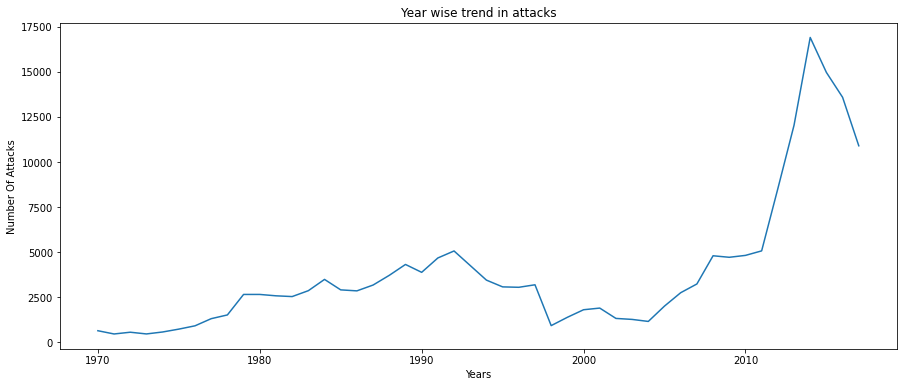

In [75]:
plt.subplots(figsize=(15,6))
yearly_attacks.plot()
plt.title('Year wise trend in attacks')
plt.ylabel('Number Of Attacks')
plt.xlabel('Years')

Looking at the above chart, we can obeserve **a massive upward trend** with occasional downs. 

The major uptrend started in the last decade of the data i.e. from 2007-08 to 2017. We know that the Financial Crisis of 2007-08 was one of the most prevalent event at this time period. This could also have been one of the factors in causing world unrest. There are two major factors which can be linked to the rise in the terrorist activities such as the political changes of the world and technological upgrades. 

Considering that the data does not consist of any such information about technology and political changes, we cannot relate this upward trend with any of those factors.

*   **Casualties per Year**

  The following graph will give us a brief understanding of the casualties happening due to the attacks



In [76]:
# Here, we will consider the wounded and the killed people as the casualties.
data['Casualties'] = data.Killed + data.Wounded

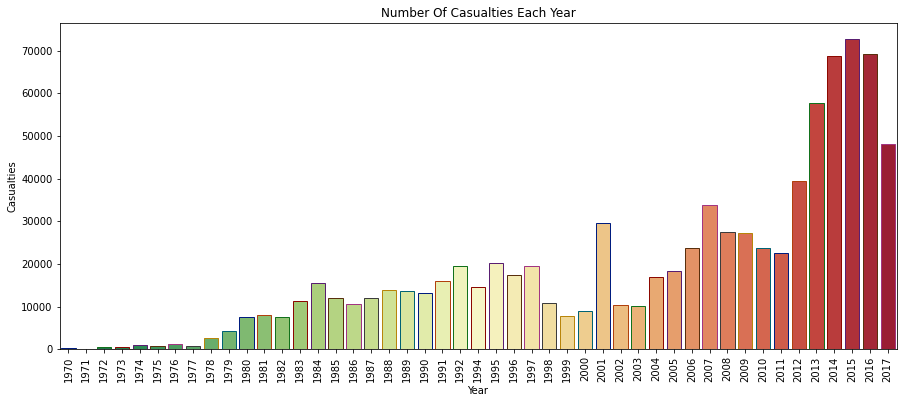

In [78]:
plt.subplots(figsize=(15,6))
year_casualties = data.groupby('Year').Casualties.sum().to_frame().reset_index()
year_casualties.columns = ['Year','Casualties']
sns.barplot(x=year_casualties.Year, y=year_casualties.Casualties, palette='RdYlGn_r',edgecolor=sns.color_palette('dark',10))
plt.xticks(rotation=90)
plt.title('Number Of Casualties Each Year')
plt.show()  

These is no wonder that the yearly casualties graph, follows the similar trend as to the yearly attacks.

*  **Regions and Countries affected by Terrorism.**
  
  Let us analyse which regions are  mostly affected by these terrorist activities and try to get some insights into them.

In [79]:
mapdata = data[['Year','Country','latitude','longitude']]
fig = px.density_mapbox(mapdata,
                        lat='latitude',
                        lon='longitude', 
                        z='Year', 
                        radius=1,
                        center=dict(lat=22.804567, lon=86.202875), 
                        zoom=2,
                        mapbox_style="open-street-map",)

fig.show()

The above Heat World Map (Density Mapbox Plot) shows the attacks that have happened in every region. The darker spots show the older attacks in the brighter spots represent the recent attacks.

Just by looking at it we can see that the majority of the terrorist activities are reported in the **Middle Eastern region** followed by our beloved neighbour and **India**.

Lets get a more readable chart for this data and check which country and region are the most affected.

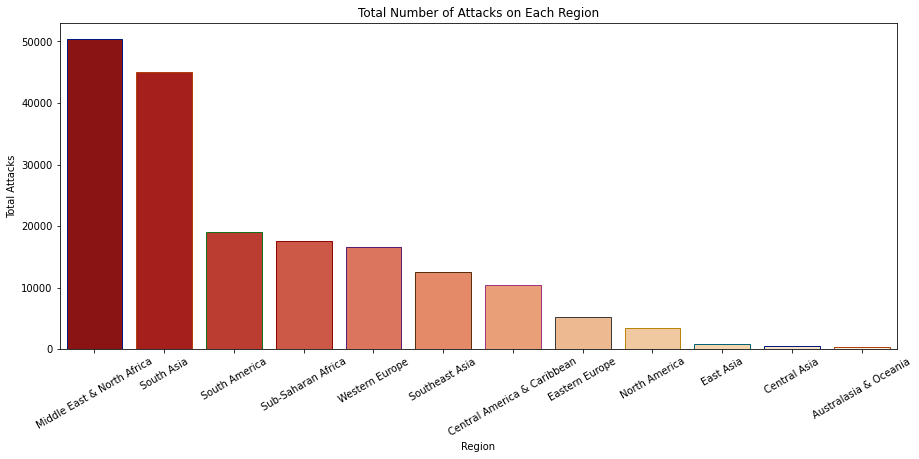

In [80]:
plt.subplots(figsize=(15,6))
region_attacks = data.Region.value_counts()[:15].reset_index()
region_attacks.columns = ['Region', 'Total Attacks']
sns.barplot(x=region_attacks.Region, y=region_attacks['Total Attacks'], palette= 'OrRd_r',edgecolor=sns.color_palette('dark',10))
plt.xticks(rotation=30)
plt.title('Total Number of Attacks on Each Region')
plt.show()

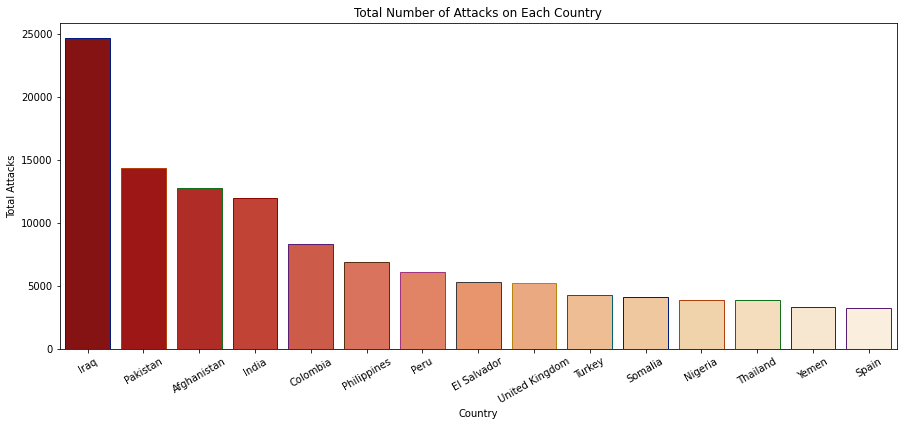

In [81]:
plt.subplots(figsize=(15,6))
country_attacks = data.Country.value_counts()[:15].reset_index()
country_attacks.columns = ['Country', 'Total Attacks']
sns.barplot(x=country_attacks.Country, y=country_attacks['Total Attacks'], palette= 'OrRd_r',edgecolor=sns.color_palette('dark',10))
plt.xticks(rotation=30)
plt.title('Total Number of Attacks on Each Country')
plt.show()

**INSIGHTS:** 

As observed above, we can see that the Middle Eastern & North African region are majorly affected by the terrorist attacks, followed closely by South Asian region, which consists of India and Pakistan.

The majorly affected countries are Iraq, Pakistan, Afghanistan, India and Colombia respectively.

The difference between the first and the second country in terms of attacks shows a drastic difference. The difference is almost 50%.

Although it is a bit surprising that Pakistan has more attacks as compared to Afganistan, considering the deployment of U.S. troops into the country during that period.

* **The Major Troublemakers :**
  
  Now that we are aware of the regions and countries which are mostly affected, we shall try to understand which are the active Terrorist Organizations and Groups causing the chaos.

In [82]:
# Grouping the terrorist groups and counting their occurence with count method.
lead_terrorist_groups = data.Group.value_counts().to_frame().drop('Unknown').reset_index()[:10]
# Dropping entries with unknown terrorist groups, because that will skew the data towards "Unknown" 


lead_terrorist_groups.columns=['Terrorist Organization','Number of Attacks']

# Creating a list of labels for the PIE chart
pilabels=list(lead_terrorist_groups['Terrorist Organization'].unique())

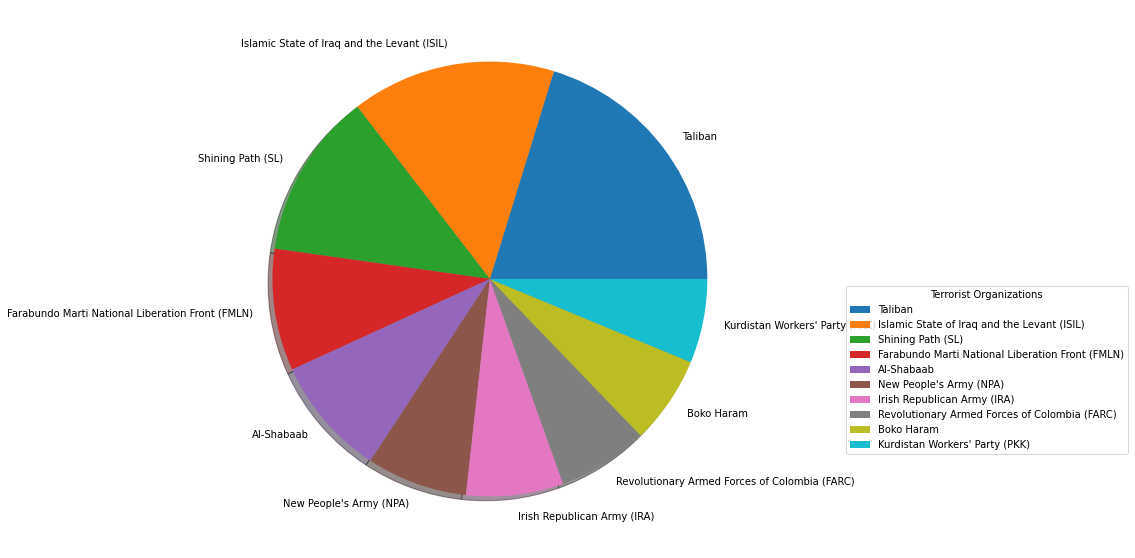

In [83]:
# Plotting the acquired data frame:

plt.subplots(figsize=(10,10))
plt.pie(lead_terrorist_groups['Number of Attacks'], labels = pilabels,startangle=0,shadow =True)
plt.legend(pilabels,title='Terrorist Organizations',bbox_to_anchor=(1,0.5),loc="upper left", fontsize=10, 
           bbox_transform=plt.gcf().transFigure)
plt.show()

**INSIGHTS:**

The above pie chart shows us that the majority of the attacks are done by **Taliban** followed by **ISIL** and **Shining Path** closely.

The mentioned 10 Terrorist groups can be definately be stated as **Active Contributers** in the global unrest.


*  Prevalent Modes of Attack.
  The attacking methodologies used by the majority of the terrorist groups can be seen in the following graph.

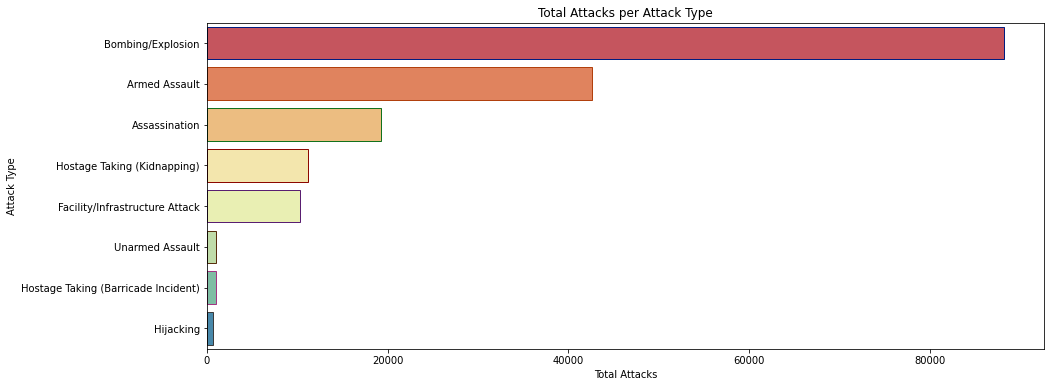

In [89]:
attack_type = data.AttackType.value_counts().to_frame().drop('Unknown').reset_index()[:10]
attack_type.columns = ['Attack Type', 'Total Attacks']
plt.subplots(figsize=(15,6))
sns.barplot(y=attack_type['Attack Type'], x=attack_type['Total Attacks'], palette='Spectral',
            edgecolor=sns.color_palette('dark', 10))
plt.title('Total Attacks per Attack Type')
plt.show()

**INSIGHTS**

The above graph shows us that the majorly used attacking mode is Bombing, followed by Armed Assaults and Assassinations. 

The later types of attacks are more focused towards individuals or smaller groups rather than general public.

Although the same cannot be said for Hijacking.

# Deep Analysis :

Now that we have understood how the world is affected by terrorism, we need to focus on some particular countries who have significant activities.

In [150]:
# Creating a Utility Function for analysis of each country. This will help us reduce the redundant coding for each country.

def get_country_report(country):
  ''' This function will take country as an argument and will return a comprehensive report for the said country.'''
  # Get the data for the mentioned country.
  country_sub_data = data.loc[(data["Country"] == str(country)),["eventid","Year","Country","Region","city","latitude","longitude","AttackType","Killed","Wounded","Casualties","Group","Weapon_type","Motive","success"]]
  

  # Getting the heat density map for the affected regions in the country.
  mapdata = country_sub_data[['Year','Country','latitude','longitude']]
  fig = px.density_mapbox(mapdata,
                        lat='latitude',
                        lon='longitude', 
                        z='Year', 
                        radius=1,
                        center=dict(lat=22.804567, lon=86.202875), 
                        zoom=3,
                        mapbox_style="open-street-map",
                        title='Attack Density Map')

  fig.show()
  print(f'The above figure shows us the affected regions of the {country}')

  # Figuring our the highly affected cities of the country.
  city_attacks = country_sub_data.city.value_counts()[:11].drop('Unknown').reset_index()
  city_attacks.columns=['City','Total Attacks']
  x = city_attacks.City
  y = city_attacks['Total Attacks']
  fig, ax = plt.subplots(figsize=(15,6))
  ax.stem(x, y,use_line_collection=True)
  plt.show()

The above figure shows us the affected regions of the India


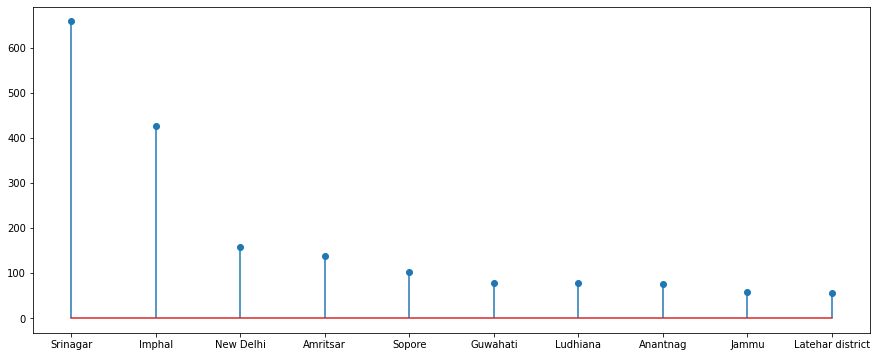

In [151]:
get_country_report("India")